In [86]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
from scipy.integrate import quad

err = 0.0001      
M2 = 4/np.exp(1)  #максимум второй производной по модулю для функции e^(-x^2)
step_optymal = (24*err/M2)**0.5 
print(step_optymal)
step = 0.01  

0.040385258412884116


In [95]:
def quad_exp(x):
    return np.exp(-x**2)

def factorial(x):
    result = 1
    if (x == 0):
        return result
    else:
        for i in range(1,x+1): 
            result*=i
        return result

def exp_taylor(x,n):
    """
    #в этом случае он не ограничивается в кол-ве членов ряда и может улететь далеко в бесконечность 
    row_elements2 = []   
    i = 0
    while (abs(np.exp((x)) - sum(row_elements2)) > err):
        row_elements2 += [(x)**i/factorial(i)]
        i += 1
    return row_elements2
    """
    row_elements = []
    for i in range(0,n):
        row_elements += [x**i/factorial(i)]
    return row_elements

def integrated_exp_taylor(x,n):
    row_elements = []
    for i in range(0,n):
        row_elements += [(-1)**i*x**(2*i+1)/(factorial(i)*(2*i+1))]
    return row_elements

def integral_trapecia(x):
    integral_sum = 0
    for i in range(len(x)-1):
        integral_sum += (sum(exp_taylor(x[i],8)) + sum(exp_taylor(x[i+1],8)))/2 * step
    return integral_sum
        
#print(sum(exp_taylor(0.1,8)))
#print(np.exp(0.1))
#print(sum(exp_taylor(0.1,8)) - np.exp(0.1))

1.1051709180753966
1.1051709180756477
-2.511324481702104e-13


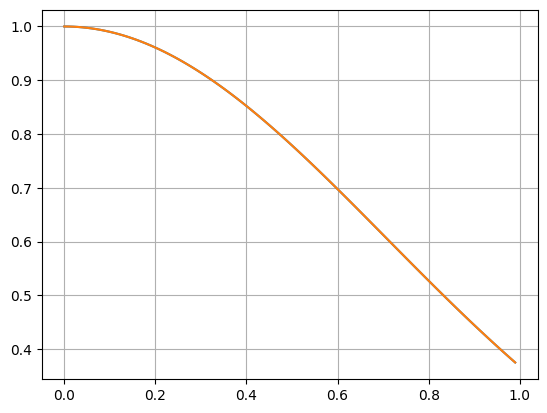

In [57]:
axis = np.arange(0,1,step)
plt.plot(axis,sum(exp_taylor(-axis**2,8)))
plt.plot(axis,np.exp(-axis**2))
plt.grid()

### Тут считаем интеграл трапециями по ряду 

In [58]:
print(integral_trapecia((-axis**2)))

0.743101114104944


### Тут считаем сумму интегрированного ряда 

In [97]:
print(sum(integrated_exp_taylor(1,8))) #тут n=8 т.к. в ряде с 7 члена порядок малости <= 10**(-4)

0.7468228068228069


### Тут считаем интеграл встроенной библиотекой

In [94]:
print(quad(quad_exp, 0, 1))

(0.7468241328124271, 8.291413475940725e-15)
